# Explore here

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

os.makedirs("../data/raw", exist_ok=True)

data.to_csv("../data/raw/diabetes_data.csv", index=False)

betes_data = pd.DataFrame(data)

betes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(betes_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = betes_data.index, columns = num_variables)
df_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [5]:
from sklearn.model_selection import train_test_split

X = df_scal.drop("Outcome", axis = 1)
y = df_scal["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.242424,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.191919,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.373737,0.437352,0.688525,0.068318,0.416667


In [6]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.7207792207792207

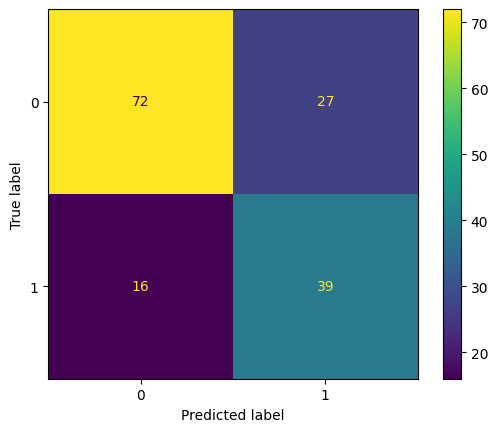

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(confusion_matrix = CM)

graph.plot()
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [0.001, 0.01, 0.1, 1, 10, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample":[0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid = GridSearchCV(model, param_grid, scoring = "accuracy", cv = 5)
grid

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [0.001, 0.01, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [11]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.8}


In [12]:
model_grid = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 3, n_estimators = 10, subsample = 0.8)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7857142857142857

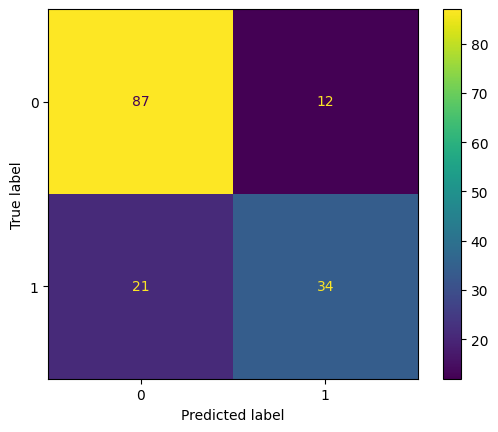

In [13]:
grid_CM = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(confusion_matrix = grid_CM)

graph.plot()
plt.show()

In [14]:
model_grid.save_model("xgb_classifier_default_42.json")